# Entendendo o matplotlib

[Matplotlib](https://matplotlib.org/) é uma biblioteca de *Python* voltada para a criação de gráficos, permitindo gerar figuras com alta qualidade para publicação em diversos formatos. A biblioteca possibilita a criação de gráficos de pontos e linhas, histogramas, densidades espectrais, gráficos de superfície e outros tipos, com apenas algumas linhas de código.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


## Conceitos do Matplotlib

A biblioteca `matplotlib` é composta por um grande número de funções, o que pode ser intimidador para iniciantes. O objetivo principal da biblioteca é facilitar a visualização de dados, oferecendo todo o controle necessário. Na maioria das situações, o usuário utilizará comandos simples e de alto nível, mas sempre mantendo a possibilidade de usar comandos mais específicos e de baixo nível, que permitem ajustar detalhes precisos dos gráficos.

O Matplotlib foi projetado com os seguintes objetivos (de acordo com a documentação do mpl):

* Os gráficos devem ter uma ótima aparência -- qualidade para publicação (por exemplo, antialiasing)
* Saída vetorial para inclusão em documentos TeX
* Integrável em uma interface gráfica para o desenvolvimento de aplicações
* O código deve ser fácil de entender e estender
* Criar gráficos deve ser fácil
* Os padrões devem ser bons, mas a personalização deve ser possível

O Matplotlib é principalmente para dados 2D, mas há algumas interfaces básicas para 3D (superfície). Dados dessa forma exigem uma abordagem diferente.

### Galeria

O Matplotlib tem uma ótima galeria em seu site — encontre algo lá que seja próximo do que você está tentando fazer e use como ponto de partida:

https://matplotlib.org/stable/gallery/index.html

Hoje em dia, acredito que você poderia simplesmente perguntar ao ChatGPT: 'Crie um gráfico no Matplotlib com quatro subpainéis organizados em uma grade 2x2, com eixos compartilhados, um mapa de cores no painel superior e uma legenda no painel inferior.'

# Anatomia de uma figura

Figuras são o objeto de nível mais alto e podem incluir múltiplos eixos
![](https://matplotlib.org/2.0.2/_images/anatomy1.png)

(figura de: http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure )


# Plotagem

O Matplotlib oferece duas formas principais de criar gráficos: **maquina de estado** e **interface orientada a objetos (OO)**. Neste tópico, vamos explorar o conceito da interface **OO**. Essa aboradaem era usada em versões anteriores do Maplotlib

- **Maquina de estado**: É uma abordagem mais simples, onde você cria gráficos diretamente com funções como `plt.plot()`, sem a necessidade de criar explicitamente figuras e eixos.

- **Interface orientada a objetos (OO)**: Neste caso, você cria explicitamente uma figura (`fig`) e um eixo (`ax`), e a partir desses objetos, configura o gráfico. Essa abordagem é mais poderosa e flexível, permitindo um maior controle sobre os elementos do gráfico.


Devido ao fato de se ter mais controle a todos os ambientes de um figura, em aplicações deixamos o nível "Maquina de estado" de lado e focaremos apenas na interface orientada a objetos.

Vamos argumentar melhor sobre isso abaixo:

## Maquina de Estado

`plot()` é o comando mais básico. Aqui também vemos que podemos usar a notação LaTeX para os eixos

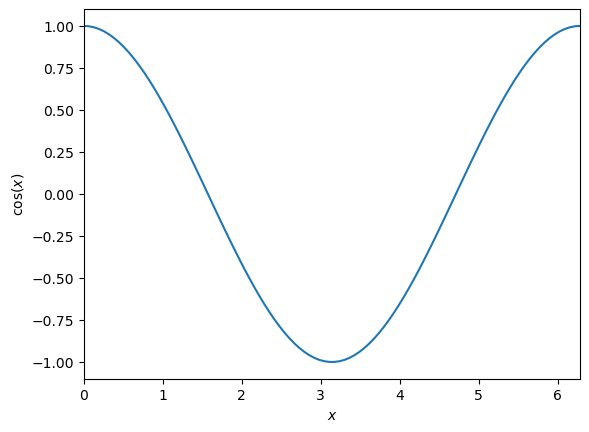

In [ ]:
x = np.linspace(0, 2*np.pi, 100)
y = np.cos(x)

plt.plot(x, y)  # Plota diretamente, sem necessidade de criar 'fig' e 'ax'
plt.xlabel(r"$x$")  # Define o rótulo do eixo x
plt.ylabel(r"$\cos(x)$")  # Define o rótulo do eixo y
plt.xlim(0, 2*np.pi)  # Define os limites do eixo x
plt.show()  # Exibe o gráfico (no jupyter não precisa desse comando)

Observe que, quando usamos o comando `plot()` dessa forma, o matplotlib cria automaticamente uma figura e um eixo para nós e desenha o gráfico neles. Esta é a interface de _máquina de estados_.

## Interface Orientade a Objetos (OO) 

O estilo OO é recomendado para quando você precisa de mais controle sobre o gráfico ou quando trabalha com múltiplos gráficos e subgráficos.

Na interface Orientade a Objetos temos que:

1. Criamos primeiramente a figura com `fig = plt.figure()`
2. Depois criamos os eixos (subplots) que queremos trabalhar (No caso de apenas uma imagem `ax = fig.add_subplot(111)`)
3. Assim com a figura e os eixos criados, podemos finalmente fazer o gráfico selecionando em qual eixo deve utilizar.
4. Por fim, podemos editar propriedades dos eixos.
5. Colocar o comando `plt.show()` para exibir o gráfico.

In [126]:
fig = plt.figure() # Criando a Figura (A tela que iremos pintar nosso gráfico)
ax = fig.add_subplot(111) # Criando o eixo

ax.plot(x, y) # Fazendo o gráfico no eixo criado anteriormente
ax.set_xlabel("$x$") # Colacanndo um rotulo para o eixo x
ax.set_ylabel("$\cos(x)$") # Colacanndo um rotulo para o eixo x
ax.set_xlim(0, 2*np.pi) # Definido o intervalo do eixo x

plt.show()

(0.0, 6.283185307179586)

Em vez de criar uma figura e adicionar um subplot (o eixo) separadamente como fizemos com `fig = plt.figure()` e `ax = fig.add_subplot(111)`, o Matplotlib também oferece uma forma mais prática e concisa de criar tanto a figura quanto os eixos ao mesmo tempo, usando o comando `plt.subplots()`.


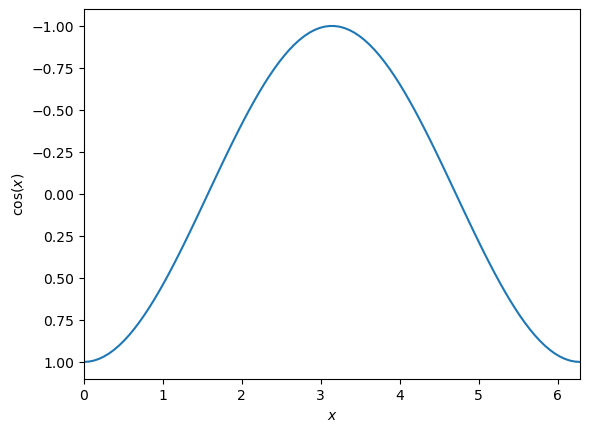

In [135]:
fig, ax = plt.subplots( )

ax.plot(x, y)
ax.set_xlabel("$x$") # Colacanndo um rotulo para o eixo x
ax.set_ylabel("$\cos(x)$") # Colacanndo um rotulo para o eixo x
ax.set_xlim(0, 2*np.pi) # Definido o intervalo do eixo x
ax.set_ylim(1.1,-1.1)

plt.show()

```{admonition} Exercício Rapído

Podemos plotar 2 linhas em um gráfico simplesmente chamando o comando `plot` duas vezes. Faça um gráfico com `sin(x)` e `cos(x)` desenhados.

```

Observe que os códigos dos exemplos na versão maquina de estados e na interface orientada a objetos são muitos parecidos. A peergunta que surge então é:

_Por que ter duas formas de fazer o mesmo gráfico?_

Para exemplos simples como este, a versão básica do *pyplot* é suficiente. No entanto, frequentemente acabamos criando os mesmos gráficos para diferentes conjuntos de dados, com apenas pequenas modificações. Nesses casos, a interface orientada a objetos se torna mais vantajosa, pois oferece mais recursos e é mais fácil de manter.


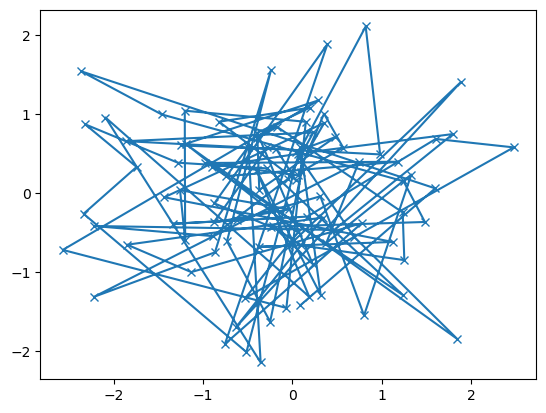

In [108]:
def meu_plotador(ax, dados1, dados2, dict_parametros):
    """
    Função auxiliar para criar um gráfico.

    Parâmetros
    ----------
    ax : Axes
        Os eixos onde o gráfico será desenhado

    dados1 : array
       Os dados para o eixo x

    dados2 : array
       Os dados para o eixo y

    dict_parametros : dict
       Dicionário com parâmetros adicionais a serem passados para ax.plot

    Retorna
    -------
    saída : list
        Lista de "artistas" adicionados (elementos visuais do gráfico)
    """
    saída = ax.plot(dados1, dados2, **dict_parametros)  # Plota os dados nos eixos 'ax' com os parâmetros dados
    return saída  # Retorna a lista de "artistas" gerados (elementos visuais)

# Que seria utilizado da seguinte forma:

dados1, dados2, dados3, dados4 = np.random.randn(4, 100)  # Gera 4 arrays de números aleatórios
fig, ax = plt.subplots(1, 1)  # Cria a figura e os eixos para o gráfico
meu_plotador(ax, dados1, dados2, {'marker': 'x'})  # Chama a função 'meu_plotador' passando os dados e parâmetros

plt.show()

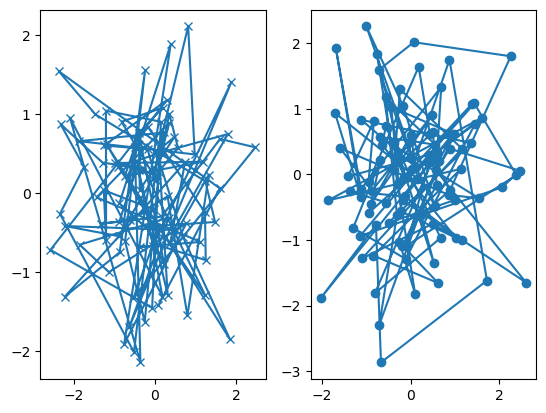

In [113]:
fig, (ax1, ax2) = plt.subplots(1, 2)
meu_plotador(ax1, dados1, dados2, {'marker': 'x'})
meu_plotador(ax2, dados3, dados4, {'marker': 'o'})

plt.show()

# Formatando o estilo dos gráficos

Vimos no último exemplo que um dos elementos visuais que inserimos foi o marcador. Vamos agora explorar mais esses aspectos visuais do gráfico.

Para isso a partir de agora iremos nos restringir apenas a interface orientada a objetos.

## Strings de Formato

Quando vamos construir um gráfico, podemos usar símbolos em vez de linhas com bastante facilidade também — e rotulá-los. O comando *plot* com *strings* de formatação permite escolher entre gráficos de linhas e de pontos.

Uma string de formato (_format string_) `fmt` é uma maneira conveniente de definir formatação básica como cor, marcador e estilo de linha. 

`fmt = '[marker][line][color]'`

Cada um desses parâmetros é opcional. Por exemplo se a linha for especificada, mas o marcador não for, os dados serão exibidos como uma linha sem marcadores.


Abaixo colocamos as opções possiveis:

<div style="display: flex; justify-content: space-between;">

  <table border="1">
    <caption><strong>Marcadores</strong></caption>
    <tr><th>Caractere</th><th>Descrição</th></tr>
    <tr><td>.</td><td>marcador de ponto</td></tr>
    <tr><td>,</td><td>marcador de pixel</td></tr>
    <tr><td>o</td><td>marcador de círculo</td></tr>
    <tr><td>v</td><td>marcador triângulo_para_baixo</td></tr>
    <tr><td>^</td><td>marcador triângulo_para_cima</td></tr>
    <tr><td>&lt;</td><td>marcador triângulo_esquerda</td></tr>
    <tr><td>&gt;</td><td>marcador triângulo_direita</td></tr>
    <tr><td>1</td><td>marcador triângulo_para_baixo</td></tr>
    <tr><td>2</td><td>marcador triângulo_para_cima</td></tr>
    <tr><td>3</td><td>marcador triângulo_esquerda</td></tr>
    <tr><td>4</td><td>marcador triângulo_direita</td></tr>
    <tr><td>s</td><td>marcador quadrado</td></tr>
    <tr><td>p</td><td>marcador pentágono</td></tr>
    <tr><td>*</td><td>marcador estrela</td></tr>
    <tr><td>h</td><td>marcador hexágono1</td></tr>
    <tr><td>H</td><td>marcador hexágono2</td></tr>
    <tr><td>+</td><td>marcador mais (+)</td></tr>
    <tr><td>x</td><td>marcador x</td></tr>
    <tr><td>D</td><td>marcador diamante</td></tr>
    <tr><td>d</td><td>marcador diamante_fino</td></tr>
    <tr><td>|</td><td>marcador linha_vertical</td></tr>
    <tr><td>_</td><td>marcador linha_horizontal</td></tr>
  </table>

  <table border="1">
    <caption><strong>Estilos de Linha</strong></caption>
    <tr><th>Caractere</th><th>Descrição</th></tr>
    <tr><td>-</td><td>estilo de linha sólida (solid)</td></tr>
    <tr><td>--</td><td>estilo de linha tracejada (dashed)</td></tr>
    <tr><td>-.</td><td>estilo de linha tracejada-ponto (dashdot) </td></tr>
    <tr><td>:</td><td>estilo de linha pontilhada (dotted)</td></tr>
  </table>

  <table border="1">
    <caption><strong>Cores</strong></caption>
    <tr><th>Caractere</th><th>Cor</th></tr>
    <tr><td>b</td><td>azul</td></tr>
    <tr><td>g</td><td>verde</td></tr>
    <tr><td>r</td><td>vermelho</td></tr>
    <tr><td>c</td><td>ciano</td></tr>
    <tr><td>m</td><td>magenta</td></tr>
    <tr><td>y</td><td>amarelo</td></tr>
    <tr><td>k</td><td>preto</td></tr>
    <tr><td>w</td><td>branco</td></tr>
  </table>

</div>

Exemplos de Strings de Formato

- `'b'`    # marcadores azuis com formato padrão
- `'or'`   # círculos vermelhos
- `'-g'`   # linha sólida verde
- `'--'`   # linha tracejada com cor padrão
- `'^k:'`  # marcadores triângulo_para_cima pretos conectados por uma linha pontilhada

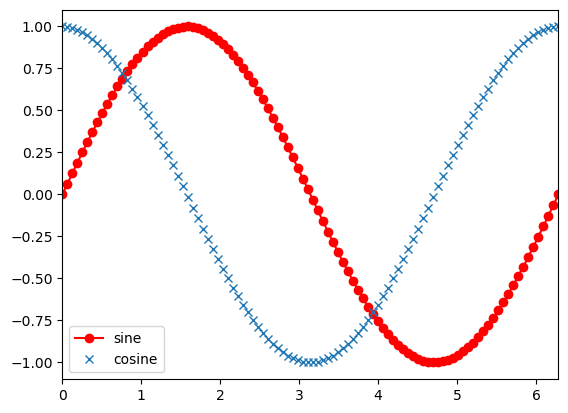

In [132]:
fig, ax = plt.subplots()

ax.plot(x, np.sin(x), "o-r", label="sine")
ax.plot(x, np.cos(x), "x", label="cosine")
ax.set_xlim(0.0, 2.0*np.pi)
ax.legend() #Esse comando exibe a legenda na figura

plt.show()

Para mais informações consulte a documentação da "string de formato" veja ([https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html](https://matplotlib.org/3.4.1/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot))


## Line2D

Você pode usar as propriedades do Line2D como argumentos de palavra-chave para controlar melhor a aparência da linha.

Line2D é uma classe do Matplotlib que representa uma linha 2D em um gráfico. Ela oferece várias propriedades que permitem personalizar a aparência da linha, como sua cor, estilo de linha, espessura, marcador, entre outras. Essas propriedades podem ser passadas como argumentos quando você cria um gráfico, ou você pode manipulá-las posteriormente para ajustar a aparência da linha.

Ao usar o **Line2D**, você pode modificar propriedades como `color`, `linestyle`, `linewidth`, `marker` e muito mais, de forma flexível.

- **`color`**: Define a cor da linha. Pode ser especificada por nome (como `'blue'`), código hexadecimal (como `'#FF5733'`), ou abreviações de cor (como `'b'` para azul).

- **`linestyle`**: Controla o estilo da linha. Além dos símbolos, também é possível usar o nome completo em inglês para o estilo da linha. Aqui estão as duas opções (símbolos e nomes completos):

<div style="text-align: center;">

| Símbolo | Nome em Inglês  |
|---------|-----------------|
| `'-'`   | `'solid'`       |
| `'--'`  | `'dashed'`      |
| `':'`   | `'dotted'`      |
| `'-.'`  | `'dashdot'`     |

</div>

- **`linewidth`**: Define a espessura da linha. O valor padrão é 1, mas você pode aumentar ou diminuir conforme necessário (por exemplo, `linewidth=2` para uma linha mais espessa).

- **`marker`**: Define o marcador para os pontos de dados. Exemplos incluem `'o'` para círculos, `'^'` para triângulos para cima, `'*'` para estrelas, entre outros já descritos anteriormente.


As propriedades da linha e o fmt (formato de estilo) podem ser combinados. As duas chamadas a seguir geram resultados idênticos:

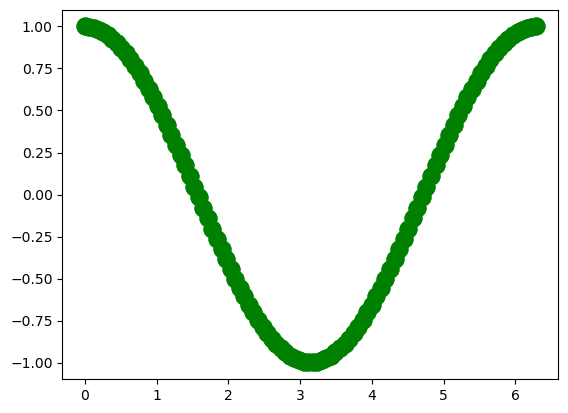

In [134]:
fig, ax = plt.subplots()

ax.plot(x, y, 'go--', linewidth=2, markersize=12)
ax.plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

plt.show()

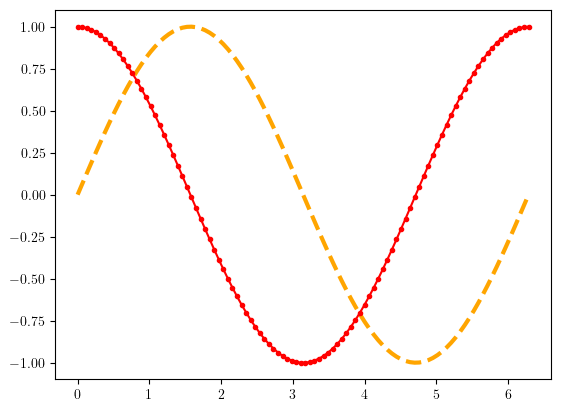

In [53]:
fig, ax = plt.subplots()

ax.plot(x, np.sin(x), color='orange', linestyle="dashed", linewidth=3.0)
ax.plot(x, np.cos(x), marker = 'o', linestyle="-", color = 'red', markersize = 3)

Existem estilos predefinidos que também podem ser usados. Geralmente, é necessário começar pela criação da figura para que esses estilos tenham efeito.

In [55]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Vamos mostrar um exemplo desse estilos pré-definidos usando a interface da maquina de estados

(0.0, 6.283185307179586)

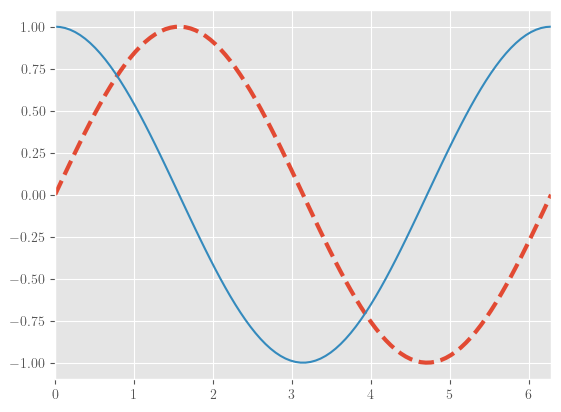

In [57]:
plt.style.use("ggplot")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, np.sin(x), linestyle="--", linewidth=3.0)
ax.plot(x, np.cos(x), linestyle="-")
ax.set_xlim(0.0, 2.0*np.pi)

Caso queria retornar a definição original, basta rodar:

In [58]:
plt.style.use("default")

## Gráficos do Tipo Dispersão e Barra

Para criar gráficos de dispersão, também é possível utilizar o comando `scatter`, que permite definir a cor e o tamanho dos pontos por meio dos argumentos `c` e `s`, respectivamente:

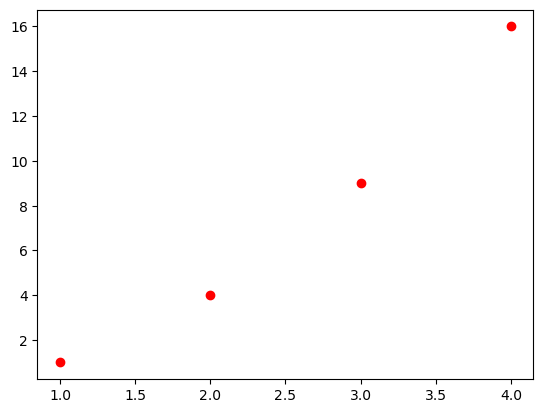

In [118]:
fig, ax = plt.subplots()

ax.scatter(
    [1, 2, 3, 4], [1, 4, 9, 16], c='r'
)

plt.show()

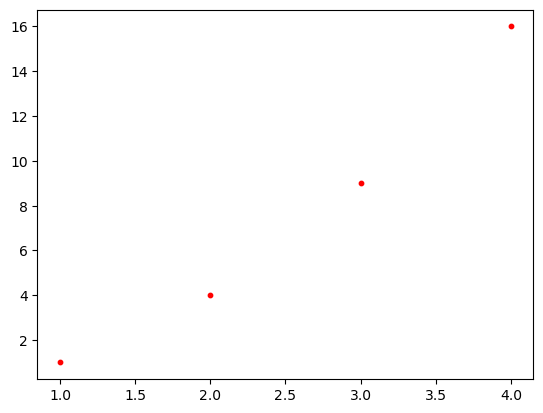

In [122]:
fig, ax = plt.subplots()

ax.scatter(
    [1, 2, 3, 4], [1, 4, 9, 16], 
    c='r', s=10
)  # pontos menores

plt.show()

Poderiamos ter gerado os mesmos gráficos usando o `plot` com a string `ro`

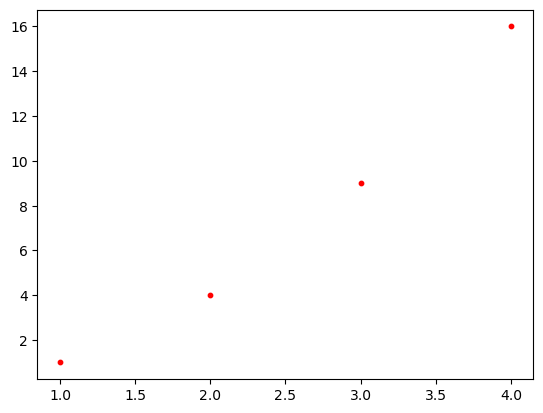

In [125]:
fig, ax = plt.subplots()

ax.plot(
    [1, 2, 3, 4], [1, 4, 9, 16], 'ro', 
    markersize=np.sqrt(10)
)  # exemplo acima usando plot

plt.show()

### Gráfico de Barras

Podemos também criar gráficos de barras.

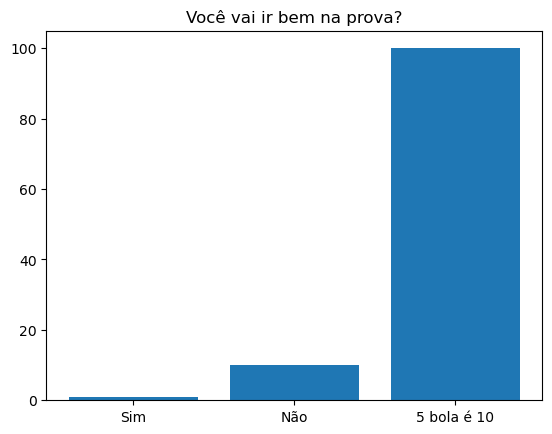

In [129]:
nomes = ['Sim', 'Não', '5 bola é 10']
valores = [1, 10, 100]

fig, ax = plt.subplots()

ax.bar(nomes, valores) # Criando a tabela

plt.title('Você vai ir bem na prova?') #Colocando Titulo no Gráfico

plt.show()

### Gráfico de Pizza

Também podemos criar gráficos de pizza utilizando  `plt.pie`

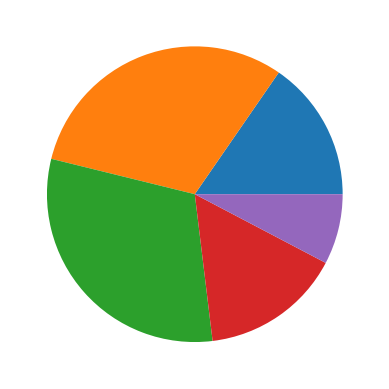

In [3]:
y = [10,20,20,10,5]
plt.pie(y)
plt.show()

Podemos adicionar os nomes da partes passando o conjunto na criação, como argumento labels:

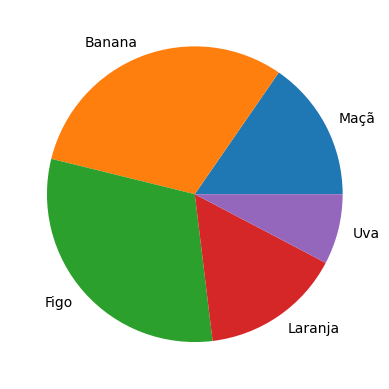

In [4]:
y = [10,20,20,10,5]
nomes = ["Maçã","Banana","Figo","Laranja", "Uva"]
plt.pie(y, labels = nomes)
plt.show()

Usando o parâmetro explode podemos passar um vetor com a porcentagem de distanciamento da fatia em relação ao todo:

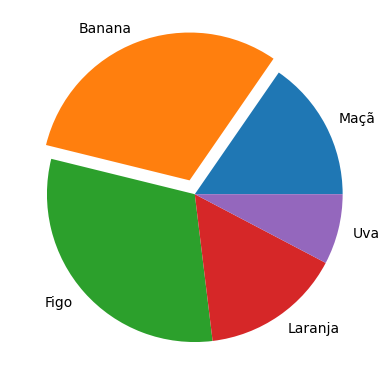

In [5]:
y = [10,20,20,10,5]
explode = (0, 0.1, 0, 0,0)
nomes = ["Maçã","Banana","Figo","Laranja", "Uva"]
plt.pie(y, explode = explode, labels = nomes)
plt.show()

Podemos também exibir as procentagens de cada parte usando `autopct`

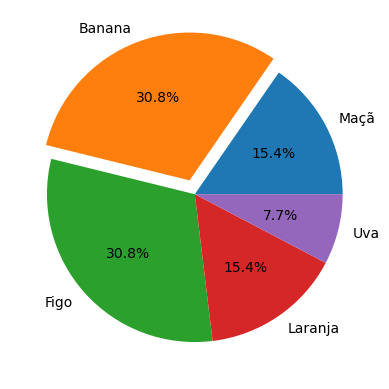

In [9]:
y = [10,20,20,10,5]
explode = (0, 0.1, 0, 0,0)
nomes = ["Maçã","Banana","Figo","Laranja", "Uva"]
plt.pie(y, explode = explode, labels = nomes, autopct='%.1f%%')
plt.show()


# Múltiplos eixos

Há uma grande variedade de métodos para colocar múltiplos eixos em uma grade. Existem duas formas principais de criar múltiplos gráficos em uma figura utilizando o Matplotlib. Ambas as abordagens permitem dividir a área da figura em subgráficos, mas com algumas diferenças na sintaxe e flexibilidade.

O método **`add_subplot()`** é utilizado para adicionar um conjunto de eixos (ou subgráficos) em uma figura. Isso é útil quando você deseja criar um gráfico com várias subáreas (subgráficos) em uma única janela de figura, o que é comum em visualizações de dados complexos.

Esse método pode receber três parâmetros principais:

1. **Número de Linhas (`nrows`)**: Define quantas linhas de subgráficos você quer na sua figura.
2. **Número de Colunas (`ncols`)**: Define quantas colunas de subgráficos você quer na sua figura.
3. **Índice do Subgráfico (`index`)**: Define qual subgráfico você está acessando (a posição do subgráfico na grade).

Podemos entender os argumentos da seguinte forma:

- **Linhas e Colunas**: A grade de subgráficos é definida por um número de linhas e colunas. O índice do subgráfico é então usado para determinar qual área da grade você está acessando.
- **Índice**: O índice é um número que representa a posição do subgráfico na grade. A numeração começa do **1** (não do 0) e segue da esquerda para a direita, de cima para baixo.


Desta maneira, se você usar `add_subplot(2, 3, 1)`, isso significa:
- **2 linhas** de subgráficos
- **3 colunas** de subgráficos
- **Índice 1**: O primeiro subgráfico na primeira linha e primeira coluna.

Aqui está a numeração dos subgráficos para a configuração 2x3:

[1] [2] [3] 

[4] [5] [6]

No exemplo abaixo, vamos dividir a figura em dois gráficos, um em cima do outro, da seguinte forma:

- Para o primeiro gráfico, utilizamos: `fig.add_subplot(211)`. Isso indica que queremos dividir a figura em uma matriz 2x1 (2 linhas e 1 coluna) e selecionar o **primeiro** elemento dessa matriz (o gráfico da parte superior).

- Para o segundo gráfico, utilizamos: `fig.add_subplot(212)`. Aqui, mantemos a mesma divisão em matriz 2x1, mas agora escolhemos o **segundo** elemento (o gráfico da parte inferior).


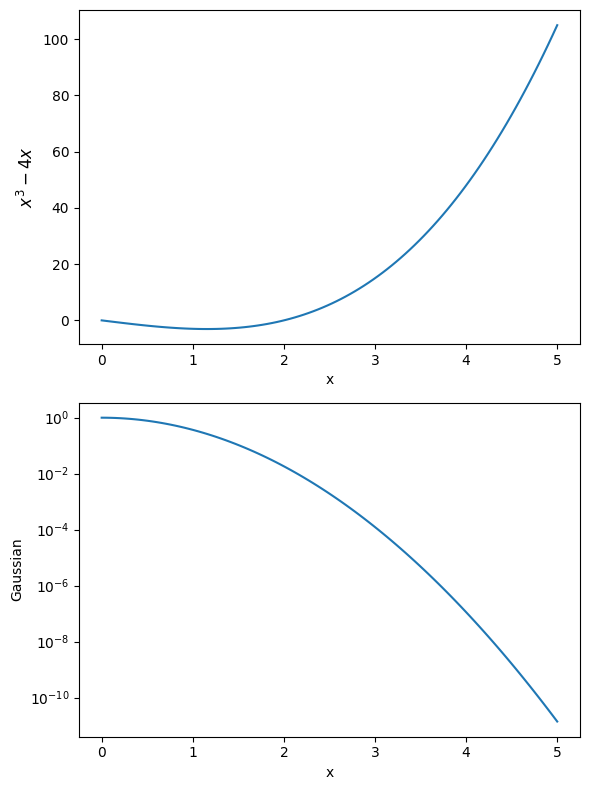

In [15]:
fig = plt.figure()

ax1 = fig.add_subplot(211) 

x = np.linspace(0,5,100)
ax1.plot(x, x**3 - 4*x)
ax1.set_xlabel("x")
ax1.set_ylabel(r"$x^3 - 4x$", fontsize="large")

ax2 = fig.add_subplot(212)

ax2.plot(x, np.exp(-x**2))
ax2.set_xlabel("x")
ax2.set_ylabel("Gaussian")

# log scale
ax2.set_yscale("log")

# set the figure size
fig.set_size_inches(6, 8)

# tight_layout() makes sure things don't overlap
fig.tight_layout()

Assim, o comando *subplot* pode ser utilizado para dividir a figura em vários gráficos organizados em uma grade. Os dois primeiros argumentos definem uma grade com um número específico de linhas e colunas, enquaunto que o terceiro argumento indica qual gráfico ocupará uma posição específica dentro dessa grade. O número do gráfico varia de 1 até o produto de `num_linhas` e `num_colunas`. 

Esse comando também pode ser utilizado com os três parâmetros separados por vírgulas. Por exemplo, `subplot(211)` é equivalente a `subplot(2, 1, 1)`. 

Vale destacar que, quando o produto de `num_linhas` e `num_colunas` for 10 ou mais, a utilização de vírgulas entre os parâmetros torna-se obrigatória.


Após introduzirmos a primeira forma de criar múltiplos gráficos utilizando `add_subplot()`, podemos explorar uma segunda abordagem, que é o método `plt.subplots()`. Essa abordagem é um pouco mais direta e permite maior flexibilidade, especialmente quando estamos lidando com um número maior de subgráficos.

O método `plt.subplots()` cria uma figura e retorna um array de eixos, permitindo que você manipule facilmente múltiplos subgráficos em uma única linha de código. Aqui está como ele funciona:

``fig, ax = plt.subplots(ncols=1, nrows=2)``

Neste caso, a função `plt.subplots()` cria uma figura (`fig`) com subgráficos organizados em uma grade de 2 linhas e 1 coluna, retornando um array de eixos (`ax`). Para acessar o primeiro gráfico, usamos `ax[0]`, e para o segundo gráfico, usamos `ax[1]`.


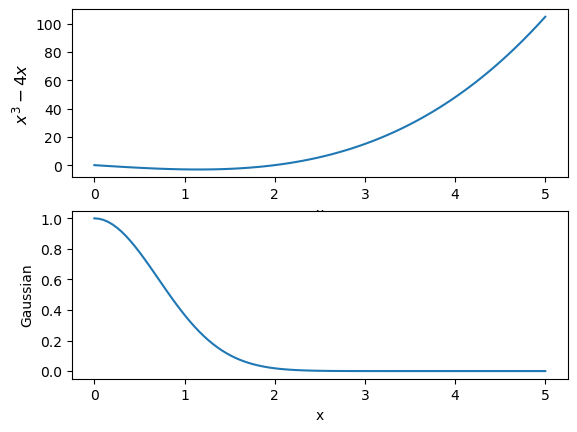

In [146]:
fig, ax = plt.subplots(ncols=1, nrows=2)


x = np.linspace(0,5,100)
ax[0].plot(x, x**3 - 4*x)
ax[0].set_xlabel("x")
ax[0].set_ylabel(r"$x^3 - 4x$", fontsize="large")

ax[1].plot(x, np.exp(-x**2))
ax[1].set_xlabel("x")
ax[1].set_ylabel("Gaussian")

plt.show()



# Dimensão da Figura

No Matplotlib, o tamanho da figura é um aspecto importante para a visualização adequada dos gráficos. Abaixo, vamos aprender como modificar o tamanho da figura de forma simples e eficiente.


O método mais comum para alterar o tamanho da figura no Matplotlib é utilizando o parâmetro `figsize` ao criar uma nova figura com `plt.figure()` ou ao usar `plt.subplots()`.

Sua sintaxes consistem em

```fig = plt.figure(figsize=(largura, altura))```

ou


``` fig, ax = plt.subplots(figsize=(largura, altura)) ```

Aqui, **largura** e **altura** são valores em polegadas que definem o tamanho da figura.  O padrão é ``figsize=(6.4, 4.8)``.

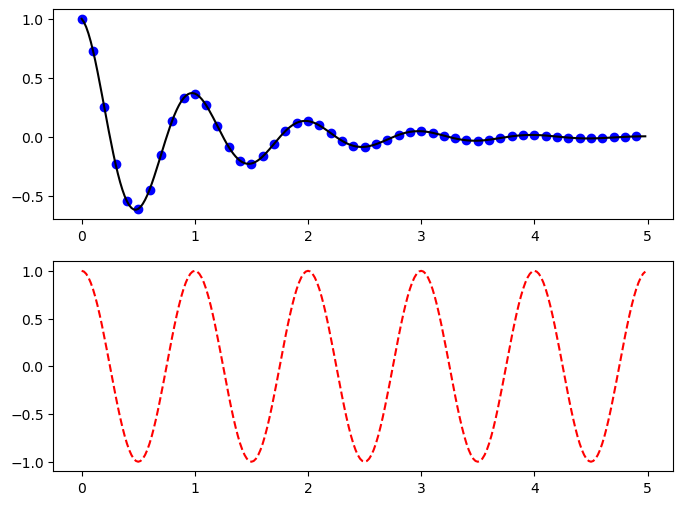

In [4]:
# Cria uma figura com tamanho de 8x6 polegadas
fig = plt.figure(figsize=(8, 6))

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

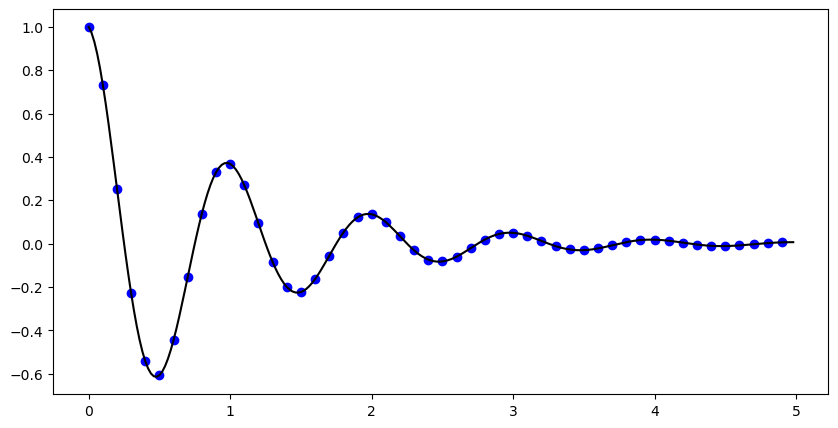

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))

# Cria um gráfico
ax.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

# Exibe o gráfico
plt.show()

```{attention}
O tamanho da figura não deve ser confundido com a resolução. A resolução pode ser controlada através do parâmetro dpi (dots per inch).
```

Por exemplo, se você quiser uma figura de 800x600 pixels com dpi=100, você pode fazer:

``fig = plt.figure(figsize=(8, 6), dpi=100)``

Ao salvar figuras com savefig(), o tamanho da figura também pode ser ajustado, garantindo que o gráfico seja exportado com o tamanho adequado.

``
plt.savefig('grafico.png', figsize=(10, 7))
 ``

bem como o dpi

``
plt.savefig('grafico.png', dpi=200)
 ``

In [ ]:
plt.savefig('grafico.png', dpi=200)

# Plotagem Avançada

Vamos agora considerar tipos de gráficos um pouco mas avançado

## Alterando Ticks no Matplotlib

No Matplotlib, os *ticks* são as marcas que aparecem nos eixos de um gráfico. Elas ajudam a mostrar as escalas e os valores representados no gráfico. Você pode personalizar esses ticks para ajustar a aparência dos eixos, melhorar a legibilidade do gráfico ou adaptar a visualização às suas necessidades.

O Matplotlib oferece funções para modificar os ticks nos eixos `x` e `y`. Você pode ajustar os valores, rótulos e até mesmo o intervalo entre os ticks.

Se você estiver trabalhando com um gráfico criado com `plt.subplots()`, pode usar os métodos `set_xticks()` e `set_yticks()` para definir manualmente os valores dos ticks.


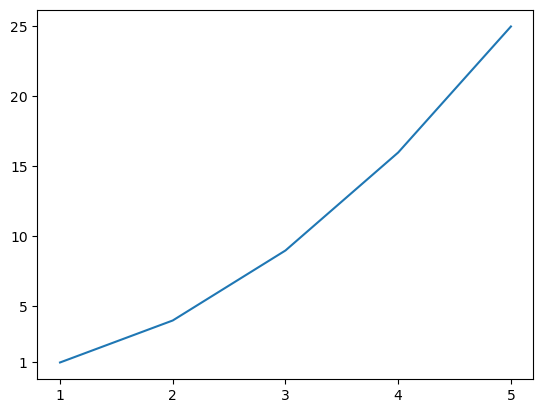

In [140]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

fig, ax = plt.subplots()

ax.plot(x, y)

# Definindo manualmente os valores dos ticks
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_yticks([1, 5, 10, 15, 20, 25])

plt.show()

Se você deseja que os ticks apareçam em intervalos específicos, pode definir os intervalos manualmente utilizando range() ou outra lógica.

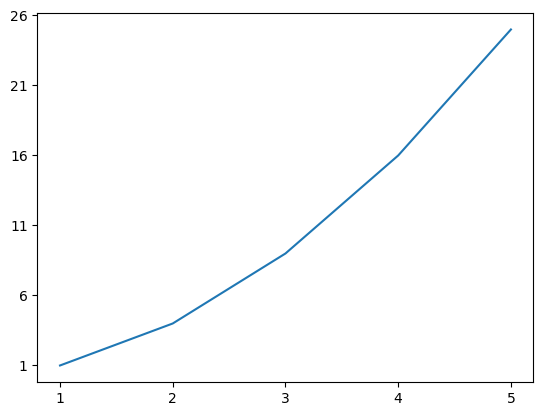

In [141]:
fig, ax = plt.subplots()

ax.plot(x, y)

# Alterando os ticks do eixo X para aparecerem a cada 1 unidade
ax.set_xticks(range(1, 6, 1))

# Alterando os ticks do eixo Y para aparecerem a cada 5 unidades
ax.set_yticks(range(1, 30, 5))

plt.show()

Os rótulos dos ticks também podem ser personalizados com os métodos ``set_xticklabels()`` e ``set_yticklabels()``. Você pode passar uma lista de novos rótulos como segundo argumento.

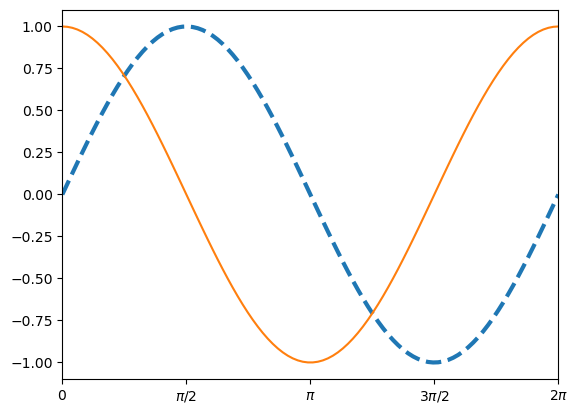

In [154]:
x = np.linspace(0,2*np.pi,100)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, np.sin(x), linestyle="--", linewidth=3.0)
ax.plot(x, np.cos(x), linestyle="-")
ax.set_xlim(0.0, 2.0*np.pi)

ax.set_xticks([0, 0.5*np.pi, np.pi, 3*np.pi/2, 2*np.pi])
ax.set_xticklabels(['$0$', '$\\pi/2$', '$\\pi$', '$3 \\pi /2$', '$2 \\pi$'])

plt.show()


## Eixos logarítmicos

Em muitos casos, os dados podem variar em uma grande escala, o que pode tornar difícil a visualização de certos padrões em gráficos com escalas lineares. Uma solução comum é usar eixos logarítmicos, onde as distâncias entre os valores aumentam de forma exponencial, permitindo que variações em escalas grandes se tornem mais evidentes.

No Matplotlib, podemos facilmente transformar a escala de um eixo para logarítmica usando os métodos ``set_xscale()`` e ``set_yscale()``. Esses métodos permitem definir a escala de um eixo como **'log'**, o que faz com que os valores do eixo sejam representados em uma escala logarítmica.

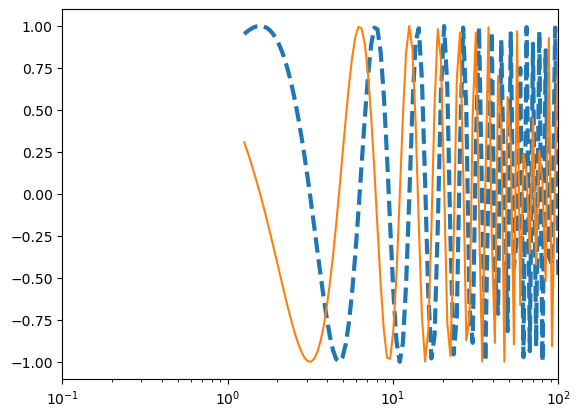

In [155]:
x = np.logspace(0.1, 2, 100)  # Gera valores logaritmicamente espaçados

fig = plt.figure()
ax = fig.add_subplot(111)

# Plota uma função qualquer
ax.plot(x, np.sin(x), linestyle="--", linewidth=3.0)
ax.plot(x, np.cos(x), linestyle="-")

# Define o eixo X como logarítmico
ax.set_xscale('log')

# Define os limites do eixo X
ax.set_xlim([0.1, 100])

# Define os ticks no eixo X
ax.set_xticks([0.1, 1, 10, 100])

# Define os rótulos dos ticks no eixo X
ax.set_xticklabels(['$10^{-1}$', '$10^{0}$', '$10^{1}$', '$10^{2}$'])

# Exibe o gráfico
plt.show()


É importante evidenciar que como o logaritmo de valores negativos ou zero não é definido, ao usar escalas logarítmicas, é importante garantir que os dados não incluam tais valores.

Para aplicar uma escala logarítmica ao eixo y, basta usar o método ``set_yscale('log')``. Isso pode ser útil quando os dados no eixo y têm uma grande variação de valores, mas permanecem positivos.

## Barras de erro

Para experimentos, frequentemente temos erros associados aos valores de $y$. Aqui, criamos alguns dados e adicionamos um pouco de ruído a eles, depois os plotamos com erros.

In [82]:
def y_experimento(a1, a2, sigma, x):
    """" retorna os dados experimentais de forma linear + aleatória 
        a1 é o intercepto, a2 é a inclinação, e sigma é o erro """


    N = len(x)

    # randn fornece amostras da distribuição "normal padrão"
    r = np.random.randn(N)
    y = a1 + a2*x + sigma*r
    return y

N = 40
x = np.linspace(0.0, 100.0, N)
sigma = 25.0*np.ones(N)
y = y_experimento(10.0, 3.0, sigma, x)

<ErrorbarContainer object of 3 artists>

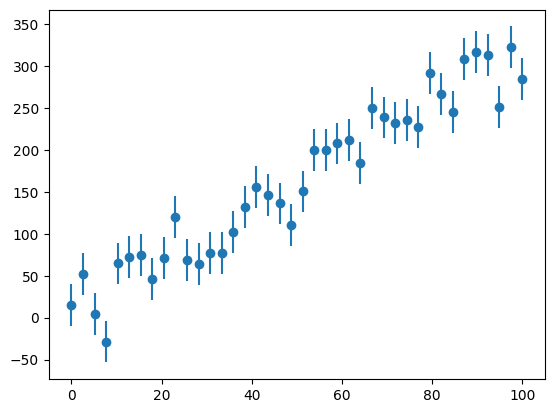

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(x, y, yerr=sigma, fmt="o")

## Anotações

Adicionar texto e anotações é fácil

In [200]:
xx = np.linspace(0, 2.0*np.pi, 1000)

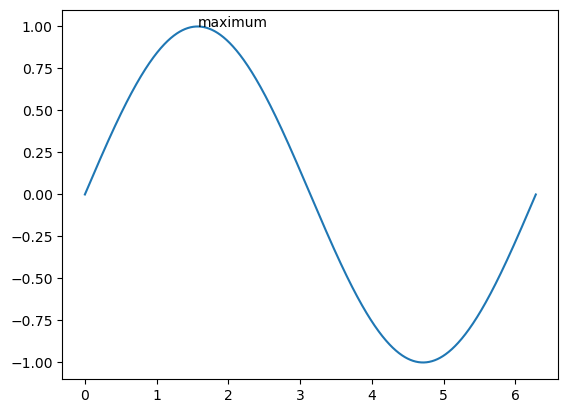

In [203]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xx, np.sin(xx))
ax.text(np.pi/2, np.sin(np.pi/2), "maximum")
plt.show()

Também podemos desativar as "margens" superior e direita

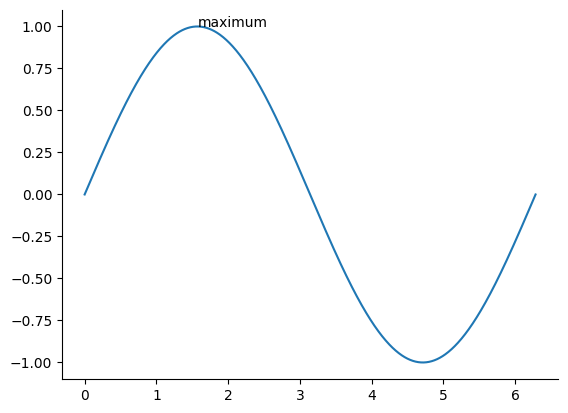

In [23]:
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')                                           
ax.yaxis.set_ticks_position('left') 
fig

Podemos usar ``arrowprops`` para adicionar uma seta a um gráfico com uma cor personalizada:

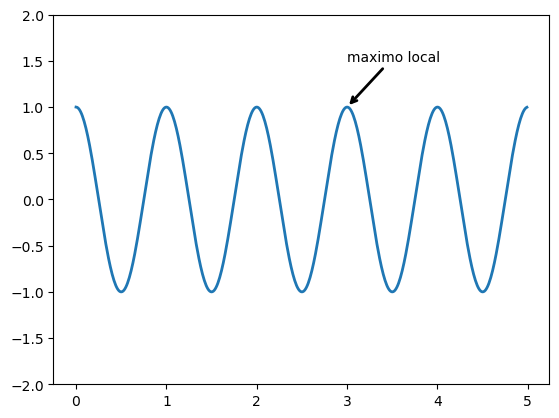

In [204]:
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

plt.plot(t, s, lw=2)

plt.annotate('maximo local', 
             xy=(3, 1), # Ponto em que a seta aponta (no gráfico)
             xytext=(3, 1.5), # Localização do texto da anotação
             arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=2),
             )

plt.ylim(-2, 2)
plt.show()

## Gráficos de superfície

O Matplotlib não lida com dados 3D reais (ou seja, x, y, z + um valor), mas ele pode plotar superfícies 2D e linhas em 3D.

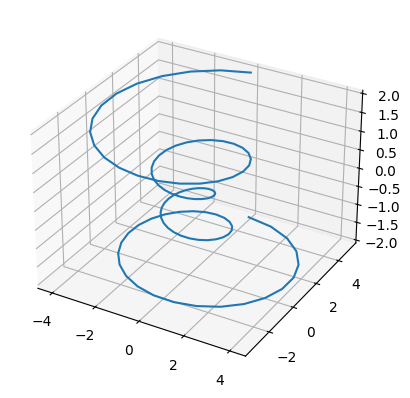

In [25]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection="3d")

# parametric curves
N = 100
theta = np.linspace(-4*np.pi, 4*np.pi, N)
z = np.linspace(-2, 2, N)
r = z**2 + 1

x = r*np.sin(theta)
y = r*np.cos(theta)

ax.plot(x,y,z)

## Histogramas

Um histograma é uma representação gráfica que mostra como os dados estão distribuídos ao dividir o intervalo dos dados em bins (caixas) e contar quantos valores estão em cada bin. Ele é útil para visualizar a frequência de ocorrência de diferentes intervalos de valores em um conjunto de dados.

No Python, o matplotlib fornece a função `hist()` para criar histogramas.

Podemos interpretar os argumentos da seguinte forma
- `density=True` para obter a normalização correta (área igual a 1)
- `data`: dados a serem visualizados.
- `bins=30`: número de intervalos (bins) no histograma. Mais bins trazem mais detalhes.
- `color='blue'`: cor das barras do histograma.
- `edgecolor='black'`: cor das bordas das barras.

Aqui geramos vários números aleatórios normalizados por uma gaussiana e fazemos um histograma. A distribuição de probabilidade deve coincidir com

$$y(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-x^2/(2\sigma^2)}$$


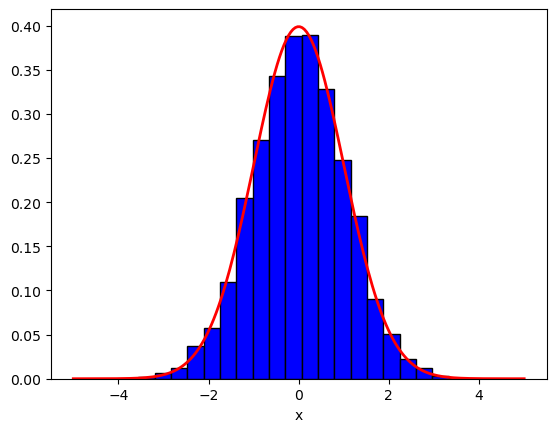

In [206]:
N = 10000
r = np.random.randn(N)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(r, density=True, bins=20, color='blue', edgecolor='black')

x = np.linspace(-5,5,200)
sigma = 1.0
ax.plot(x, np.exp(-x**2/(2*sigma**2))/(sigma*np.sqrt(2.0*np.pi)),
         c="r", lw=2)
ax.set_xlabel("x")

plt.show()

## Padrões: matplotlib rc

Você pode especificar opções gráficas padrão que serão usadas em todos os seus gráficos nesse script/notebook. Isso é feito através de `rcParams`. Por exemplo:

In [93]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'


data = np.random.randn(50)
plt.plot(data)


Para voltar a configuração padrão, rodamos:

In [101]:
mpl.rcParams.update(mpl.rcParamsDefault) #Reset


## Mais gráficos

Há muitos projetos novos, alguns construídos sobre o matplotlib, outros independentes.
Um objetivo comum para muitos deles é permitir a exploração interativa de dados no navegador. Muitos usam a biblioteca Javascript `d3.js` para isso.

- **mpld3**: http://mpld3.github.io/ (Funcionalidades 3D)
- **Bokeh**: http://bokeh.pydata.org/en/latest/ (amigável para o navegador)
- **plot.ly**: https://plotly.com/python/ (amigável para o navegador, talvez até demais)
- **Glue**: http://www.glueviz.org/en/stable/ (explorar relações entre conjuntos de dados relacionados)
- **D3PO**: http://d3po.org/
- **d3py**: https://github.com/mikedewar/d3py (inativo?)
- **Seaborn**: http://web.stanford.edu/~mwaskom/software/seaborn/ (baseado no matplotlib)
- **ggplot**: https://github.com/yhat/ggplot/ (para usuários de R)


# Exercises

For the exam, please prepare 2 exercises from this list.

In [32]:
import matplotlib.pyplot as plt
import numpy as np

## Q1: Tuftian plot

- Pick the worst plot you ever published in paper or put in your MSc thesis (you know what I'm talking about, the one that looks real crap!)
- Go through Tufte's principles and annotate all you've done wrong.
- Redo the plot, but this time go for "graphical excellence". 
- Compare the result with what you had before.

## Q2: Planetary positions

The distances of the planets from the Sun (technically, their semi-major axes) are:

In [33]:
a = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06, 39.48])

These are in units where the Earth-Sun distance is 1 (astronomical units).

The corresponding periods of their orbits (how long they take to go once around the Sun) are, in years

In [34]:
P = np.array([0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8, 248.09])

Finally, the names of the planets corresponding to these are:

In [35]:
names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", 
         "Uranus", "Neptune", "Pluto"]

(technically, pluto isn't a planet anymore, but we still love it :)

  * Plot as points, the periods vs. distances for each planet on a log-log plot.

  * Write the name of the planet next to the point for that planet on the plot

## Q3: A perfect circle

For an angle $\theta$ in the range $\theta \in [0, 2\pi]$, the polar equations of a circle of radius $R$ are:

$$x = R\cos(\theta)$$

$$y = R\sin(\theta)$$

We want to draw a circle.   

  * Create an array to hold the theta values&mdash;the more we use, the smoother the circle will be
  * Create `x` and `y` arrays from `theta` for your choice of $R$
  * Plot `y` vs. `x`
  
Now, look up the matplotlib `fill()` function, and draw a circle filled in with a solid color.

Generalize your circle drawing commands to produce a function, 
```
draw_circle(x0, y0, R, color)
```
that draws the circle.  Here, `(x0, y0)` is the center of the circle, `R` is the radius, and `color` is the color of the circle.  

Now randomly draw 10 circles at different locations, with random radii, and random colors on the same plot.

## Q4: Climate

Download the data file of global surface air temperature averages from here:
https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt
This data comes from: https://data.giss.nasa.gov/gistemp/graphs/

(Don't ask, of course you can download data straight from python! Packages `requests` and `urllib` can both do the job)

There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.  

  * Read in this data using `np.loadtxt()`.  
  * Plot as a line the smoothed representation of the temperature changes.  
  * Plot as points the temperature change (no smoothing).  Color the points blue if they are < 0 and color them red if they are >= 0
  
You might find the numpy `where()` function useful.

## Q5: Subplots

matplotlib has a number of ways to create multiple axes in a figure -- look at `plt.subplots()` (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

Create an `x` array using NumPy with a number of points, spanning from $[0, 2\pi]$.  

Create 3 axes vertically, and do the following:

* Define a new numpy array `f` initialized to a function of your choice.
* Plot f in the top axes
* Compute a numerical derivative of `f`,
   $$ f' = \frac{f_{i+1} - f_i}{\Delta x}$$
  and plot this in the middle axes
* Do this again, this time on $f'$ to compute the second derivative and plot that in the bottom axes


## Q6: frequent words plotting

In this exercise, we will read the file with the transcription of _Star Trek TOS, Shore Leave_ and calculate the amount of time each word was found. We will then plot the 25 most frequent words and label the plot.

#### Read the file and create the dictionaty {'word':count}

   * Open the `shore_leave.txt` file in the class repository
   * Create the dictionary of the form {'word':count}, where `count` shows the amount of times the word was found in the text. Remember to get rid of the punctuation ("." and ",") and to ensure that all words are lowercase

In [36]:
f = open("shore_leave.txt", "r")

for line in f:
    pass

#### Plot 25 most frequent words

Plot a labelled bar chart of the most frequent 25 words with their frequencies.

## Q7: Mandelbrot set

The [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) is defined such that $z_{k+1} = z_k^2 + c$
remains bounded, which is usually taken as $|z_{k+1}| <= 2$
where $c$ is a complex number and we start with $z_0 = 0$

We want to consider a range of $c$, as complex numbers $c = x + iy$,
where $-2 < x < 2$ and $-2 < y < 2$.

For each $c$, identify its position on a Cartesian grid as $(x,y)$ and 
assign a value $N$ that is the number of iterations, $k$, required for $|z_{k+1}|$ to become greater than $2$.

The plot of this function is called the Mandelbrot set.

Here's a simple implementation that just does a fixed number of iterations and then colors points in Z depending on whether they satisfy $|z| \le 2$.  

Your task is to extend this to record the number of iterations it takes for each point in the Z-plane to violate that constraint,
and then plot that data -- it will show more structure


In [37]:
N = 256
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

xv, yv = np.meshgrid(x, y, indexing="ij")

In [38]:
c = xv + 1j*y

z = np.zeros((N, N), dtype=np.complex128)

for i in range(10):
    z = z**2 + c
    
m = np.ones((N, N))
m[np.abs(z) <= 2] = 0.0

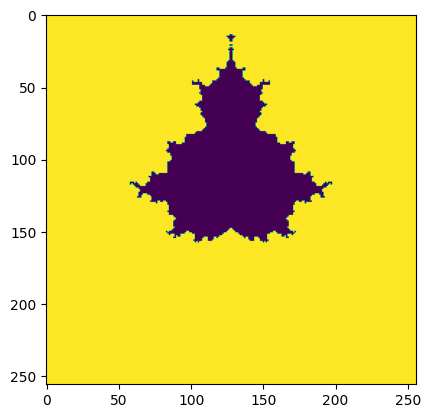

In [39]:
fig, ax = plt.subplots()
ax.imshow(m)

## Q8: Game of Life visualization

If you've implemented Conway's Game of Life from last lecture, make a visualization of your result using matplotlib

## Q9: Quit smoking

If you ever used ROOT for your scientific plotting, it's not good for your health.
